# Tutorial 03 - Analysing Data Sets

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/openforcefield/openff-evaluator/blob/master/docs/tutorials/tutorial03.ipynb)

In this tutorial we will be analysing the results of the calculations which we performed in the [second tutorial](tutorial02.ipynb). 
The tutorial will cover:

- comparing the estimated data set with the experimental data set.
- plotting the two data sets. 

*Note: If you are running this tutorial in google colab you will need to run a setup script instead of following the 
installation instructions:*

In [1]:
# !pip install -q condacolab
# import condacolab
# condacolab.install_miniconda()
# !wget https://raw.githubusercontent.com/openforcefield/openff-evaluator/master/docs/tutorials/colab_setup.ipynb
# %run colab_setup.ipynb

For the sake of clarity all warnings will be disabled in this tutorial:

In [2]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("openforcefield").setLevel(logging.ERROR)

## Loading the Data Sets

We will begin by loading both the experimental data set and the estimated data set:

In [3]:
from openff.evaluator.datasets import PhysicalPropertyDataSet

experimental_data_set_path = "filtered_data_set.json"
estimated_data_set_path = "estimated_data_set.json"

# If you have not yet completed the previous tutorials or do not have the data set files 
# available, copies are provided by the framework:

# from openff.evaluator.utils import get_data_filename
# experimental_data_set_path = get_data_filename(
#     "tutorials/tutorial01/filtered_data_set.json"
# )
# estimated_data_set_path = get_data_filename(
#     "tutorials/tutorial02/estimated_data_set.json"
# )

experimental_data_set = PhysicalPropertyDataSet.from_json(experimental_data_set_path)
estimated_data_set = PhysicalPropertyDataSet.from_json(estimated_data_set_path)

if everything went well from the previous tutorials, these data sets will contain the density and $H_{vap}$ of ethanol 
and isopropanol:

In [4]:
experimental_data_set.to_pandas().head()

,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Density Value (g / ml),Density Uncertainty (g / ml),EnthalpyOfVaporization Value (kJ / mol),EnthalpyOfVaporization Uncertainty (kJ / mol),Source
0,298.15,101.325,Liquid,1,CC(C)O,Solvent,1.0,None,0.78270,NaN,NaN,NaN,10.1016/j.fluid.2013.10.034
1,298.15,101.325,Liquid,1,CCO,Solvent,1.0,None,0.78507,NaN,NaN,NaN,10.1021/je1013476
2,298.15,101.325,Liquid + Gas,1,CCO,Solvent,1.0,None,NaN,NaN,42.26,0.02,10.1016/S0021-9614(71)80108-8
3,298.15,101.325,Liquid + Gas,1,CC(C)O,Solvent,1.0,None,NaN,NaN,45.34,0.02,10.1016/S0021-9614(71)80108-8


In [5]:
estimated_data_set.to_pandas().head()

,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Density Value (g / ml),Density Uncertainty (g / ml),EnthalpyOfVaporization Value (kJ / mol),EnthalpyOfVaporization Uncertainty (kJ / mol),Source
0,298.15,101.325,Liquid,1,CCO,Solvent,1.0,None,0.791767,0.000705,NaN,NaN,SimulationLayer
1,298.15,101.325,Liquid + Gas,1,CCO,Solvent,1.0,None,NaN,NaN,39.434820,0.170356,SimulationLayer
2,298.15,101.325,Liquid,1,CC(C)O,Solvent,1.0,None,0.804158,0.000680,NaN,NaN,SimulationLayer
3,298.15,101.325,Liquid + Gas,1,CC(C)O,Solvent,1.0,None,NaN,NaN,45.649979,0.234394,SimulationLayer


## Extracting the Results

We will now compare how the value of each property estimated by simulation deviates from the experimental measurement. 

To do this we will extract a list which contains pairs of experimental and evaluated properties. We can easily match 
properties based on the unique ids which were automatically assigned to them on their creation:

In [6]:
properties_by_type = {
    "Density": [],
    "EnthalpyOfVaporization": []
}

for experimental_property in experimental_data_set:

    # Find the estimated property which has the same id as the
    # experimental property.
    estimated_property = next(
        x for x in estimated_data_set if x.id == experimental_property.id
    )
    
    # Add this pair of properties to the list of pairs
    property_type = experimental_property.__class__.__name__
    properties_by_type[property_type].append((experimental_property, estimated_property))

## Plotting the Results

We will now compare the experimental results to the estimated ones by plotting them using `matplotlib`:

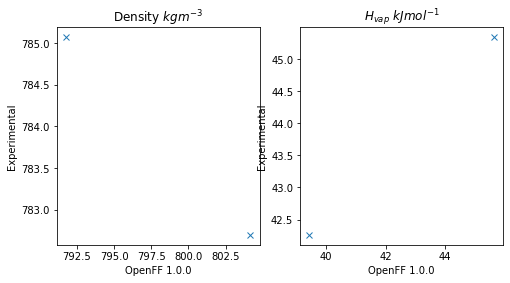

In [7]:
from matplotlib import pyplot

# Create the figure we will plot to.
figure, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(8.0, 4.0))

# Set the axis titles
axes[0].set_xlabel('OpenFF 1.0.0')
axes[0].set_ylabel('Experimental')
axes[0].set_title('Density $kg m^{-3}$')

axes[1].set_xlabel('OpenFF 1.0.0')
axes[1].set_ylabel('Experimental')
axes[1].set_title('$H_{vap}$ $kJ mol^{-1}$')

# Define the preferred units of the properties
from openff.evaluator import unit

preferred_units = {
    "Density": unit.kilogram / unit.meter ** 3,
    "EnthalpyOfVaporization": unit.kilojoule / unit.mole
}

for index, property_type in enumerate(properties_by_type):

    experimental_values = []
    estimated_values = []

    preferred_unit = preferred_units[property_type]

    # Convert the values of our properties to the preferred units.
    for experimental_property, estimated_property in properties_by_type[property_type]:
        
        experimental_values.append(
            experimental_property.value.to(preferred_unit).magnitude
        )
        estimated_values.append(
            estimated_property.value.to(preferred_unit).magnitude
        )

    axes[index].plot(
        estimated_values, experimental_values, marker='x', linestyle='None'
    )


## Conclusion

And that concludes the third tutorial!

If you have any questions and / or feedback, please open an issue on the
[GitHub issue tracker](https://github.com/openforcefield/openff-evaluator/issues).